# Restauración de imágenes mediante optimización con Mínimos Cuadrados
## Proyecto Final - Introducción a la optimización
### Francisco Gómez

#### Integrantes:
* David Antonio Garzon Avendano
* David Ricardo Pedraza
* Daniel Santiago Pardo Gomez
* Natalia Monroy Rosas


<img src='https://drive.google.com/uc?id=1T5ClhyRJhtVksUGADjsNlD0gkfI1MtJS'>

## Motivación

Nunca es posible capturar una imagen completamente fiel a la escena que se desea representar, porque existe un problema de pérdida de información debido a diversos factores, como:
*   Ruido
*   Turbulencia atmosférica
*   Lentes fuera de foco
*   Limitaciones de los sistemas de captura (óptica, física, costos, etc)
*   Resolución finita de los sensores
*   Errores de transmisión

Este problema resulta importante puessto que se encuentra en numerosas aplicaciones, desde la **exploración espacial** hasta la **microscopía** y **neuroimágenes**, como también la **fotografía digital y comercial**. Probablemente sea seguro afirmar que no existe un área de aplicación en la que se adquieran y utilicen imágenes y videos que no tenga un potencial de recuperación o reestructuración. Por ejemplo, luego del lanzamiento a órbita del telescopio Hubble, se detectó que su espejo principal no estaba cortado correctamente y era miope. Por esta razón Hubble observaba imágenes muy borrosas, y por ello durante 1990 y 1993 los astrónomos implementaron algoritmos de restauración para recuperar la información perdida de las imágenes.

## Datos

<img src='https://drive.google.com/uc?id=1HOgiESsstbOwNAD8Tm_PRxFieTiB0TSw'>

**Contexto:** El telescopio espacial Hubble es un telescopio espacial que se lanzó a la órbita terrestre baja en 1990 y sigue en funcionamiento. No fue el primer telescopio espacial, pero es uno de los más grandes y versátiles. Es conocido como una herramienta de investigación vital para la astronomía. \\
**Descripción**: Este conjunto de datos consta de las 100 mejores imágenes enviadas por el Telescopio Hubble tomadas de la página web de Kaggle. \\
**Fuente**: [Kaggle-Hubble DataSet](https://www.kaggle.com/datasets/redwankarimsony/top-100-hubble-telescope-images)

In [ ]:
!pip install opendatasets --upgrade

# Descargamos el data set de manera local
import opendatasets as od
import os

dataset_url = 'https://www.kaggle.com/datasets/redwankarimsony/top-100-hubble-telescope-images'
od.download(dataset_url)

data_dir = './top-100-hubble-telescope-images'
os.listdir(data_dir)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading top-100-hubble-telescope-images.zip to ./top-100-hubble-telescope-images


100%|██████████| 4.88G/4.88G [00:42<00:00, 124MB/s] 


['potw1752b.tif',
 'potw1821a.tif',
 'heic0206a.tif',
 'heic1516a.tif',
 'potw1345a.tif',
 'heic0910s.tif',
 'heic0814a.tif',
 'opo0501a.tif',
 'heic0910i.tif',
 'potw1346a.tif',
 'heic0406a.tif',
 'potw1802a.tif',
 'potw1442a.tif',
 'heic1410a.tif',
 'potw1714a.tif',
 'heic1808a.tif',
 'heic1815a.tif',
 'opo9942a.tif',
 'heic1520a.tif',
 'heic1105a.tif',
 'heic0719a.tif',
 'heic0515a.tif',
 'heic1110a.tif',
 'heic1814b.tif',
 'potw1752a.tif',
 'heic1406a.tif',
 'heic0904f.tif',
 'heic1713a.tif',
 'opo0328a.tif',
 'heic0503a.tif',
 'potw1822a.tif',
 'heic0108a.tif',
 'heic1323a.tif',
 'heic0411a.tif',
 'opo0006a.tif',
 'heic1305a.tif',
 'potw1542a.tif',
 'potw1818a.tif',
 'opo0028a.tif',
 'heic1503a.tif',
 'opo1438b.tif',
 'heic0707a.tif',
 'potw1451a.tif',
 'heic1118a.tif',
 'heic1806a.tif',
 'heic0822a.tif',
 'heic0822b.tif',
 'heic1608a.tif',
 'heic1712a.tif',
 'heic0715a.tif',
 'heic1707a.tif',
 'heic0604a.tif',
 'heic0910h.tif',
 'potw1020a.tif',
 'heic0911b.tif',
 'opo0511a.tif',

In [ ]:
import shutil, random, os
dirpath = './top-100-hubble-telescope-images/'
destDirectory = './images-selected'

filenames = ['heic1713a.tif', 'heic1815a.tif', 'heic0910i.tif', 'heic1007a.tif', 'heic0715a.tif']
for fname in filenames:
    srcpath = os.path.join(dirpath, fname)
    shutil.copy(srcpath, os.path.join(destDirectory, fname))

## Teoría

### Una brevísima explicación sobre mínimos cuadrados

EL problema de mínimos cuadrados usual tiene la siguiente forma:
$$
\min _{x}\|A x-b\|^{2}
$$
donde definiremos$\|y\|^{2} \equiv \sum_{i} y_{i}^{2}=y^{T} y$ como la norma euclidiana usual (y $y^{T}$ denota la transpuesta de $y$ ). Este problema tiene una sola solución dado que $A$ tenga columnas independientes, y por lo tanto que $A^{T} A$ sea invertible. . Esto es verdad dado que este problema es **convexo**, y es diferenciable de modo que
$$
\nabla\|A z-b\|^{2}=\nabla(A z-b)^{T}(A z-b)=2 A^{T}(A z-b)=0
$$
reorganizando esta ecuación,
$$
A^{T} A x=A^{T} b .
$$
Esta ecuación es llamada normal, que tiene una única solución para $z$ ya que hemos dicho que $A^{T} A$ es invertible. En otras palabras, podemos escribir esta ecuación para $x$
$$
x=\left(A^{T} A\right)^{-1} A^{T} b_{-}
$$
Para presentar este tipo de problema, veremos que este problema puede extenderse para problemas con múltiples objetivos. Para $\lambda_{i}>0$
$$
\min _{x} \lambda_{1}\left\|A_{1} x-b_{1}\right\|^{2}+\lambda_{2}\left\|A_{2} x-b_{2}\right\|^{2}+\cdots+\lambda_{n}\left\|A_{n} z-b_{n}\right\|^{2}
$$
Notando esto, podemos poner $\lambda_{i}$ dentro de la norma (el caso para dos objetivos)
$$
\|a\|^{2}+\|b\|^{2}=\left\|\left[\begin{array}{l}
a \\
b
\end{array}\right]\right\|^{2}
$$
Podemos escribir el problema multiobjetivo como
$$
\lambda_{1}\left\|A_{1} x-b_{1}\right\|^{2}+\lambda_{2}\left\|A_{2} z-b_{2}\right\|^{2}=\left\|\left[\begin{array}{c}
\sqrt{\lambda_{1}} A_{1} \\
\sqrt{\lambda_{2}} A_{2}
\end{array}\right] x-\left[\begin{array}{c}
\sqrt{\lambda_{1}} b_{1} \\
\sqrt{\lambda_{2}} b_{2}
\end{array}\right]\right\|^{2}
$$
Donde estas matrices arriba se definen adhiriéndolas a  $A_{1}, A_{2}$ y el vector 'adherido' $b_{1}, b_{2}$. O, definiendo
$$
\bar{A} \equiv\left[\begin{array}{l}
\sqrt{\lambda_{1}} A_{1} \\
\sqrt{\lambda_{2}} A_{2}
\end{array}\right]
$$
y
$$
\bar{b} \equiv\left[\begin{array}{c}
\sqrt{\lambda_{1}} b_{1} \\
\sqrt{\lambda_{2}} b_{2}
\end{array}\right]
$$
tenemos el problema equivalente
$$
\min _{x}\|\bar{A} z-\bar{b}\|^{2}
$$
que puede ser resuelto del mismo modo que antes.
Esto nos permite resolver una enorme variedad de problemas.

## Descripción del problema

### Modelación matemática de la restauración de imágenes

Dada una imagen borrosa representada por un vector $v$ y un operador gaussiano de desenfoque $G$ representado por una matriz. Lo que deseamos es minimizar un problema de esta forma

$$\text{min}_w\|Gw - v\|²$$

donde $w$ es un vector que representa la imagen reconstruida. Esto es: queremos una reconstrucción $w$ que al ser distorsionada sea lo más semejante posible a nuestra imagen de entrada $v$: 

$$Gw ≈ v$$

Note que convoluciones con kernels gaussianos 2D son separables en dos 1D y con el uso del producto de Kronecker para determinar las matrices individuales. $G$ es entonces el producto de cada una de las convoluciones. En esencia este es un problema de mínimos cuadrados.

Para eliminar los pixelamientos, considere un punto en la imagen en cuestión. Tome el gradiente en este punto y observe que, si este gradiente es grande, estamos frente a una imagen con variación de color grande, es decir, no muy "suave" o pixelada. Por el contrario: si en este punto, el gradiente es pequeño, tenemos que la imagen es nítida en este punto.

¿Cómo hacemos que la conjura de los gradientes de todos los puntos en la imagen sea tan pequeña como estimemos deseable? \\
Sea $D_x$ una matriz de diferencias entre el pixel $(i,j)$ y $(i+1,j)$ y $D_y$ la matriz diferencia entre $(i,j)$ y $(i,j+1)$. Nuestro objetivo es pues.


$$\text{min}_v \|Gw -v\|^2 + \lambda (\|D_x v\|²+\|D_y v\|²)$$

donde $\lambda \geq 0$ es nuestro parámetro de suavidad. Si $\lambda$ tiende a infinito nuestra imagen sería "infinitamente suave". Si $\lambda$ es muy grande, nuestra imagen se empaña, es nítida y sin cambios abruptos de color o pixelamientos. Por el contrario, si $\lambda$ es muy pequeño incurriremos en un aspecto granulado donde lo que nos importa es la precisión, por lo que si hacemos $\lambda$ demasiado pequeño lo que obtenemos es un problema de mínimos cuadrados clásico. Dependiendo de lo que consideremos importante en la reconstrucción de la imagen es posible ajustar este parámetro y obtener una mejor solución al problema.

## Código

In [ ]:
#Se importan librerías para manejo de los datos
%pylab inline
import cv2
from PIL import Image
import scipy.sparse as sparse
import scipy.linalg as linalg
import scipy.optimize as optimize
import scipy.ndimage.filters as fi
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Para trabajar en este problema vamos a utilizar el efecto del desenfoque gaussiana (utilizado en el procesamiento de imagen para reducir el detalle de las imagenes) este tipo ruido es representado por una matriz "kernel gaussiano", es decir, una matriz cuadrada de distribución gaussiana donde el valor del centro tiene  el valor de probabilidad mas grande y los valores decrecen conforme se alejan del centro.

In [ ]:
def gaussian_kernel(k_len = 5, sigma = 3):
    d_mat = zeros((k_len, k_len))
    d_mat[k_len//2, k_len//2] = 1
    return fi.gaussian_filter(d_mat, sigma)

El tamaño del kernel y el parametro $\sigma$ (desviación estandar) definiran que tan extendido y suave será el desenfoque

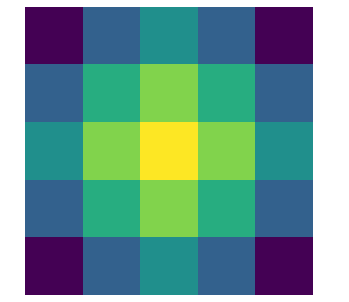

In [ ]:
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(gaussian_kernel(), interpolation='nearest')

Para aplicar el ruido gaussiano hacemos de $K_G$ el kernel descrito anteriormente convolución con la matriz de pixeles en escala de grises $M$, es decir:
$$M_{blurred}=M \ast K_G $$
**Nota:** Para una imagen a color aplicariamos la convolución en los tres canales de color (rojo, verde y azul).

In [ ]:
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size 
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

def blur_image(img_name, nitems, sigma):
  size = 550, 550
  orginal_img = Image.open(img_name)
  sqr_img = make_square(orginal_img)
  sqr_img.thumbnail(size, Image.ANTIALIAS)
  sqr_img.getdata()
  r, g, b = sqr_img.split()
  ra = np.array(r)
  ga = np.array(g)
  ba = np.array(b)
  gray = (.21*ra + 0.72*ga + 0.7*ba)    #Cambio a escala de grises
  blurry_image = convolve2d(gray, gaussian_kernel(nitems, sigma))
  return orginal_img, sqr_img, gray, blurry_image

def show_image(img_name, map='Greys_r'):
  axis('off')
  ax = Axes(gcf(), [0,0,1,1])
  ax.set_axis_off()
  gcf().add_axes(ax)
  ax.imshow(img_name, cmap=map)

Dado que nuestro proposito es modelar el problema como un problema de optimización convexa de la forma $$\min \|Ax-b\|^2\quad 0\preceq x$$ Debemos construir la matriz $G$ que va a representar el desenfoque de la imagen tal que se aplique como una multiplicación usual de matrices, entonces veremos la convolución de dos dimensionses como el producto de dos convoluciones unidimensionales, entonces:
$$G=(T\ast I_{m+N})(I_m\ast T)$$

Donde $T$ es la matriz de Toeliptz de la convolución gausiana de tamaño $n$, y $m$ la dimension de la imagen cuadrada.

In [ ]:
# Generates the toeplitz matrix for the 1D convolution
def toeplitz(b, n):
    m = len(b)
    T = zeros((n+m-1, n))
    for i in range(n+m-1):
        for j in range(n):
            if 0 <= i-j < m:
                T[i,j] = b[i-j]
    return T

def gaussian1d(k_len = 5, sigma = 3):
    return gaussian_kernel(k_len, sigma)[k_len//2,:]

Para finalizar segun el tipo de imagen borrosa que querramos recuperar podemos requerir una imagen mas o menos suavizada, para ello podemos penalizar de cierta manera el cambio brusco de color dentro de nuestra imagen reconstruida.
Así con un $\lambda\geq 0$ adecuado tenemos que:
$$\min_x \|Gx-y\|^2+λ(\|D_xx\|^2+\|D_yx\|^2)$$


In [ ]:
c_final_image_smooth = optim_output['x']

axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(c_final_image_smooth.reshape((N,)*2), cmap='Greys_r')
savefig('smoothed_corrupted_reconstructed_image_l={}.png'.format(l))


## Ejemplos

 Imagen Deteriorada


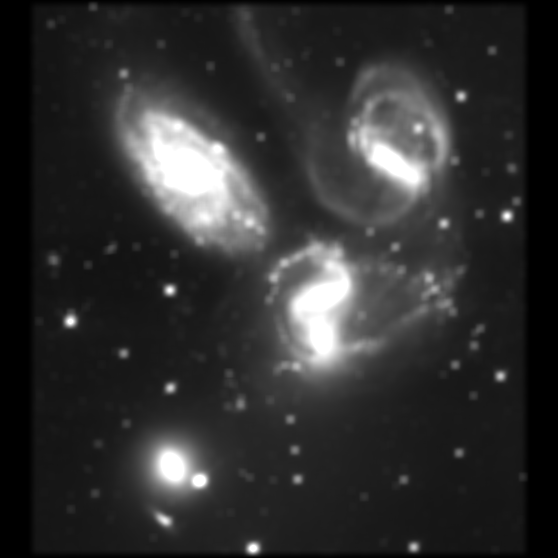

In [ ]:
#### TEST 1
import os
nitems, sigma = 9, 3
sample_directory = './images-selected/'
fnames = os.listdir(sample_directory)

filename = fnames[0]
full_path = os.path.join(sample_directory, filename)
orginal_img, sqr_img, img_gbr, blurry_image = blur_image(full_path, nitems, sigma)
width, height = sqr_img.size
N = int(width)

print(" Imagen Deteriorada")
cv2_imshow(blurry_image)


Imagen Reconstruida


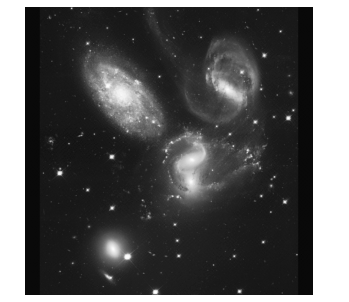

In [ ]:
curr_1d_kernel = gaussian1d(nitems, sigma)
T = toeplitz(curr_1d_kernel, N)

row_mat = sparse.kron(sparse.eye(N), T)
col_mat = sparse.kron(T, sparse.eye(N+8))
G = col_mat.dot(row_mat)

flat_blurry_image = blurry_image.flatten()

def lst_sq(x, A=G, b=flat_blurry_image):
    return linalg.norm(b - A.dot(x))**2
def lst_sq_grad(x, A=G, b=flat_blurry_image):
    return 2*A.T.dot(A.dot(x) - b)

optim_output = optimize.minimize(lst_sq, np.zeros(N**2), method='L-BFGS-B', jac=lst_sq_grad, options={'disp':True})
final_image = optim_output['x']

print("Imagen Reconstruida")
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(final_image.reshape((N,)*2), cmap='Greys_r')

 Imagen Deteriorada


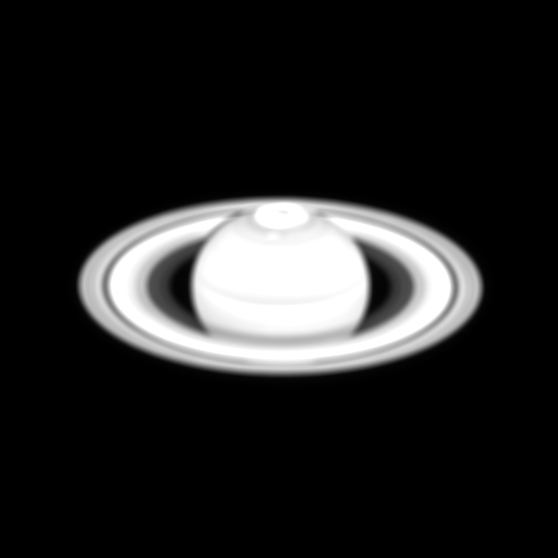

In [ ]:
#### TEST 2
import os
nitems, sigma = 9, 3
sample_directory = './images-selected/'
fnames = os.listdir(sample_directory)

filename = fnames[1]
full_path = os.path.join(sample_directory, filename)
orginal_img, sqr_img, img_gbr, blurry_image = blur_image(full_path, nitems, sigma)
width, height = sqr_img.size
N = int(width)

print(" Imagen Deteriorada")
cv2_imshow(blurry_image)


Imagen Reconstruida 


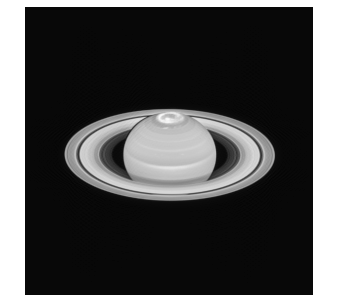

In [ ]:
curr_1d_kernel = gaussian1d(nitems, sigma)
T = toeplitz(curr_1d_kernel, N)

row_mat = sparse.kron(sparse.eye(N), T)
col_mat = sparse.kron(T, sparse.eye(N+8))
G = col_mat.dot(row_mat)

flat_blurry_image = blurry_image.flatten()

L = zeros((N-1, N))
i,j = indices(L.shape)
L[i==j] = 1
L[i==j-1] = -1

Dx = sparse.kron(sparse.eye(N), L)
Dy = sparse.kron(L, sparse.eye(N))

l = 1e-15

def smoothed_sq(x, A=G, b=flat_blurry_image, l=l):
    return linalg.norm(b - A.dot(x))**2 + l*(linalg.norm(Dx.dot(x))**2 + linalg.norm(Dy.dot(x))**2)
def smoothed_sq_grad(x, A=G, b=flat_blurry_image, l=l):
    return 2*(A.T.dot(A.dot(x) - b) +2*l*(Dx.T.dot(Dx.dot(x)) + Dy.T.dot(Dy.dot(x))))


optim_output = optimize.minimize(lambda x: smoothed_sq(x),
                                 np.zeros(N**2),
                                 method='L-BFGS-B',
                                 jac=lambda x: smoothed_sq_grad(x),
                                 options={'disp':True})
final_image = optim_output['x']

print("Imagen Reconstruida ")
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(final_image.reshape((N,)*2), cmap='Greys_r')

 Imagen Deteriorada


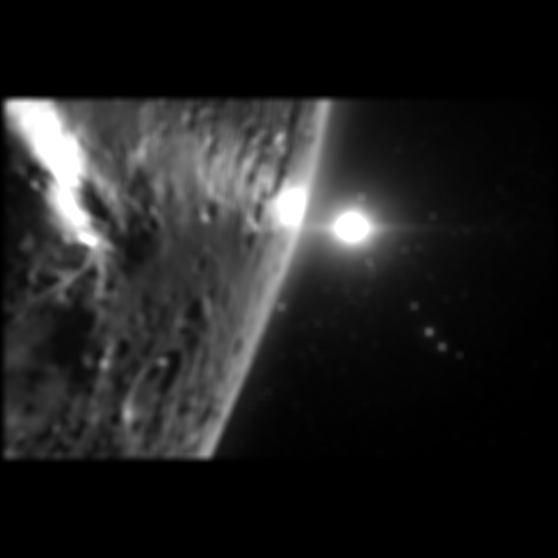

In [ ]:
#### TEST 3
import os
nitems, sigma = 9, 3
sample_directory = './images-selected/'
fnames = os.listdir(sample_directory)

filename = fnames[2]
full_path = os.path.join(sample_directory, filename)
orginal_img, sqr_img, img_gbr, blurry_image = blur_image(full_path, nitems, sigma)
width, height = sqr_img.size
N = int(width)

print(" Imagen Deteriorada")
cv2_imshow(blurry_image)


Imagen Reconstruida 


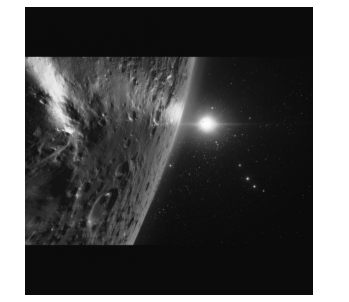

In [ ]:
curr_1d_kernel = gaussian1d(nitems, sigma)
T = toeplitz(curr_1d_kernel, N)
row_mat = sparse.kron(sparse.eye(N), T)
col_mat = sparse.kron(T, sparse.eye(N+8))
G = col_mat.dot(row_mat)
flat_blurry_image = blurry_image.flatten()

L = zeros((N-1, N))
i,j = indices(L.shape)
L[i==j] = 1
L[i==j-1] = -1

Dx = sparse.kron(sparse.eye(N), L)
Dy = sparse.kron(L, sparse.eye(N))

l = 1e-15

def smoothed_sq(x, A=G, b=flat_blurry_image, l=l):
    return linalg.norm(b - A.dot(x))**2 + l*(linalg.norm(Dx.dot(x))**2 + linalg.norm(Dy.dot(x))**2)
def smoothed_sq_grad(x, A=G, b=flat_blurry_image, l=l):
    return 2*(A.T.dot(A.dot(x) - b) +2*l*(Dx.T.dot(Dx.dot(x)) + Dy.T.dot(Dy.dot(x))))


optim_output = optimize.minimize(lambda x: smoothed_sq(x),
                                 np.zeros(N**2),
                                 method='L-BFGS-B',
                                 jac=lambda x: smoothed_sq_grad(x),
                                 options={'disp':True})
final_image = optim_output['x']
print("Imagen Reconstruida ")
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(final_image.reshape((N,)*2), cmap='Greys_r')

 Imagen Deteriorada


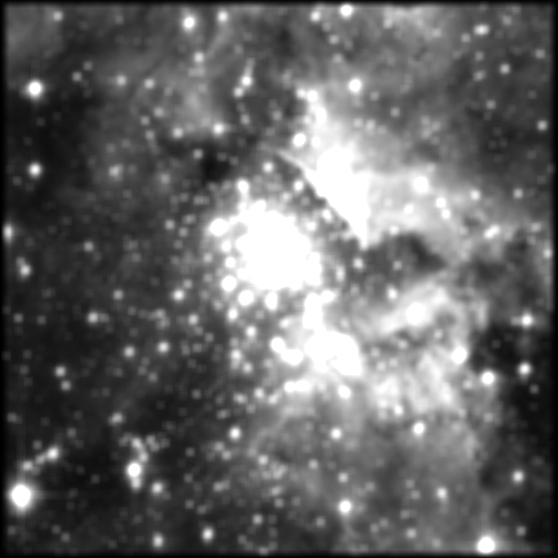

In [ ]:
#### TEST 4
import os
nitems, sigma = 9, 3
sample_directory = './images-selected/'
fnames = os.listdir(sample_directory)

filename = fnames[3]
full_path = os.path.join(sample_directory, filename)
orginal_img, sqr_img, img_gbr, blurry_image = blur_image(full_path, nitems, sigma)
width, height = sqr_img.size
N = int(width)

print(" Imagen Deteriorada")
cv2_imshow(blurry_image)


Imagen Reconstruida 


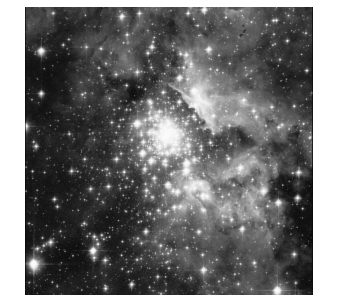

In [ ]:
curr_1d_kernel = gaussian1d(nitems, sigma)
T = toeplitz(curr_1d_kernel, N)
row_mat = sparse.kron(sparse.eye(N), T)
col_mat = sparse.kron(T, sparse.eye(N+8))
G = col_mat.dot(row_mat)
flat_blurry_image = blurry_image.flatten()

L = zeros((N-1, N))
i,j = indices(L.shape)
L[i==j] = 1
L[i==j-1] = -1

Dx = sparse.kron(sparse.eye(N), L)
Dy = sparse.kron(L, sparse.eye(N))

l = 1e-15

def smoothed_sq(x, A=G, b=flat_blurry_image, l=l):
    return linalg.norm(b - A.dot(x))**2 + l*(linalg.norm(Dx.dot(x))**2 + linalg.norm(Dy.dot(x))**2)
def smoothed_sq_grad(x, A=G, b=flat_blurry_image, l=l):
    return 2*(A.T.dot(A.dot(x) - b) +2*l*(Dx.T.dot(Dx.dot(x)) + Dy.T.dot(Dy.dot(x))))


optim_output = optimize.minimize(lambda x: smoothed_sq(x),
                                 np.zeros(N**2),
                                 method='L-BFGS-B',
                                 jac=lambda x: smoothed_sq_grad(x),
                                 options={'disp':True})
final_image = optim_output['x']
print("Imagen Reconstruida ")
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(final_image.reshape((N,)*2), cmap='Greys_r')

 Imagen Deteriorada


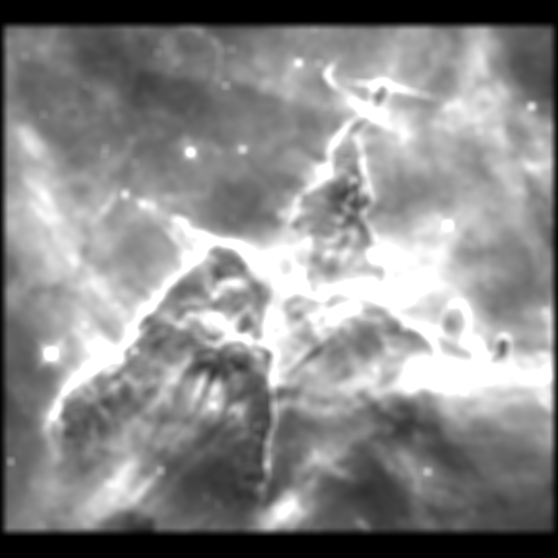

In [ ]:
#### TEST 5
import os
nitems, sigma = 9, 3
sample_directory = './images-selected/'
fnames = os.listdir(sample_directory)

filename = fnames[4]
full_path = os.path.join(sample_directory, filename)
orginal_img, sqr_img, img_gbr, blurry_image = blur_image(full_path, nitems, sigma)
width, height = sqr_img.size
N = int(width)

print(" Imagen Deteriorada")
cv2_imshow(blurry_image)


Imagen Reconstruida 


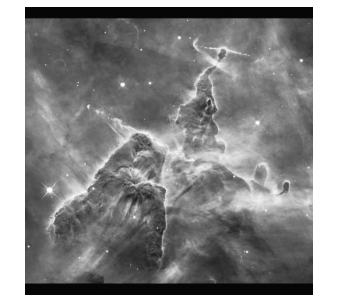

In [ ]:
curr_1d_kernel = gaussian1d(nitems, sigma)
T = toeplitz(curr_1d_kernel, N)
row_mat = sparse.kron(sparse.eye(N), T)
col_mat = sparse.kron(T, sparse.eye(N+8))
G = col_mat.dot(row_mat)
flat_blurry_image = blurry_image.flatten()

L = zeros((N-1, N))
i,j = indices(L.shape)
L[i==j] = 1
L[i==j-1] = -1

Dx = sparse.kron(sparse.eye(N), L)
Dy = sparse.kron(L, sparse.eye(N))

l = 1e-15

def smoothed_sq(x, A=G, b=flat_blurry_image, l=l):
    return linalg.norm(b - A.dot(x))**2 + l*(linalg.norm(Dx.dot(x))**2 + linalg.norm(Dy.dot(x))**2)
def smoothed_sq_grad(x, A=G, b=flat_blurry_image, l=l):
    return 2*(A.T.dot(A.dot(x) - b) +2*l*(Dx.T.dot(Dx.dot(x)) + Dy.T.dot(Dy.dot(x))))


optim_output = optimize.minimize(lambda x: smoothed_sq(x),
                                 np.zeros(N**2),
                                 method='L-BFGS-B',
                                 jac=lambda x: smoothed_sq_grad(x),
                                 options={'disp':True})
final_image = optim_output['x']
print("Imagen Reconstruida ")
axis('off')
ax = Axes(gcf(), [0,0,1,1])
ax.set_axis_off()
gcf().add_axes(ax)
ax.imshow(final_image.reshape((N,)*2), cmap='Greys_r')

## Referencias




*   Angeris, G., 2022. Least-squares and image processing. [online] Guille.site. Available at: <https://guille.site/ls-images.html> [Accessed 29 June 2022].
*  Gonzalez, R. and Woods, R., 2008. Digital image processing. 4th ed. New Jersey: Parson.
* Kaggle.com. 2022. Top 100 Hubble Telescope Images. [online] Available at: <https://www.kaggle.com/datasets/redwankarimsony/top-100-hubble-telescope-images> [Accessed 29 June 2022].

* NASA. 2022. Hubble's Mirror Flaw. [online] Available at: <https://www.nasa.gov/content/hubbles-mirror-flaw> [Accessed 27 June 2022].

*   NASA. 2022. About The Hubble Space Telescope. [online] Available at: <https://www.nasa.gov/mission_pages/hubble/about> [Accessed 29 June 2022].